In [28]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("ggplot")

In [32]:
dfs = []
for csv_file in Path("report_results").glob("*.csv"):
    df = pd.read_csv(csv_file)
    dfs.append(df)

plotting_df = pd.concat(dfs)
plotting_df["length_bucket"] = pd.cut(
    plotting_df["example_length"],
    bins=[0, 10, 20, 50, np.inf],
    labels=["0-9", "10-19", "20-49", "50+"]
)

In [35]:
plotting_df = plotting_df.groupby(["timestamp", "model", "length_bucket"])

,Unnamed: 0,timestamp,model,example_length,target,prediction,correct,length_bucket
0,0,143417,DeepCBOW,4,2,2,1,0-9
1,1,143417,DeepCBOW,21,3,3,1,20-49
2,2,143417,DeepCBOW,23,4,3,0,20-49
3,3,143417,DeepCBOW,26,2,1,0,20-49
4,4,143417,DeepCBOW,9,4,3,0,0-9


<Axes: xlabel='model', ylabel='correct'>

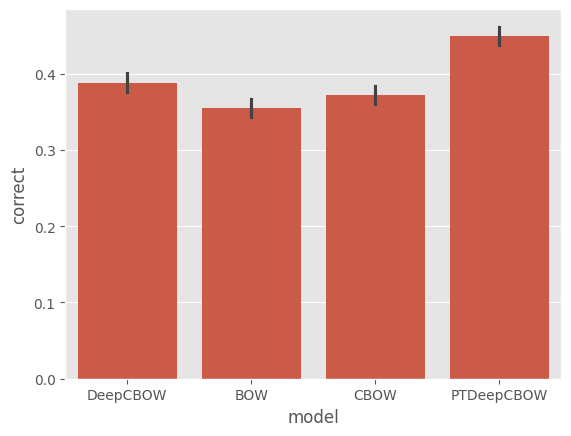

In [33]:
sns.barplot(plotting_df, x="model", y="correct")

<Axes: xlabel='length_bucket', ylabel='correct'>

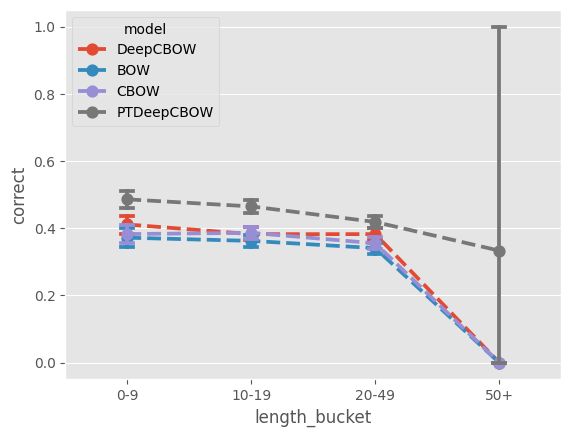

In [34]:
sns.pointplot(
    data=plotting_df,
    x="length_bucket",
    y="correct",
    markers='o',
    capsize=0.1,
    linestyles="--",
    hue="model"
)